In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [398]:
test  = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [399]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
mode_size = train.pivot_table(values='Outlet_Size' , columns='Outlet_Type' , aggfunc=(lambda x : x.mode()[0]))
missing_values = train['Outlet_Size'].isnull()
train.loc[missing_values , 'Outlet_Size'] = train.loc[missing_values , 'Outlet_Type'].apply(lambda x : mode_size[x])

In [400]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())
mode_size_test = test.pivot_table(values='Outlet_Size' , columns='Outlet_Type' , aggfunc=(lambda x : x.mode()[0]))
missing_values_test = test['Outlet_Size'].isnull()
test.loc[missing_values_test , 'Outlet_Size'] = test.loc[missing_values_test , 'Outlet_Type'].apply(lambda x : mode_size_test[x])

c:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

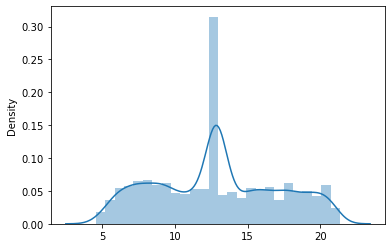

In [401]:
sns.distplot(x = train['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

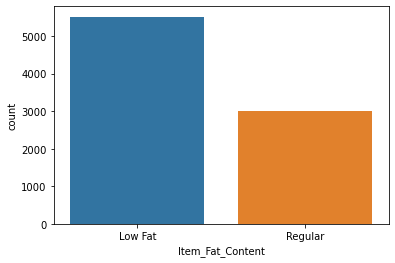

In [402]:
train.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat' , 'LF' : 'Low Fat' , 'reg' : 'Regular'}} , inplace=True)
test.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat' , 'LF' : 'Low Fat' , 'reg' : 'Regular'}} , inplace=True)
sns.countplot(x = train['Item_Fat_Content'])

c:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

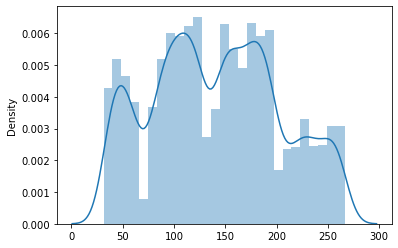

In [403]:
sns.distplot(x = train['Item_MRP'])

c:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

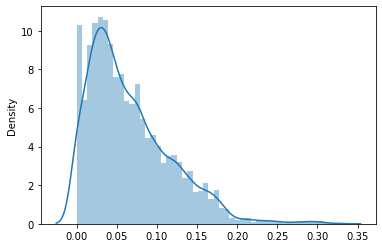

In [404]:
sns.distplot(x = train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

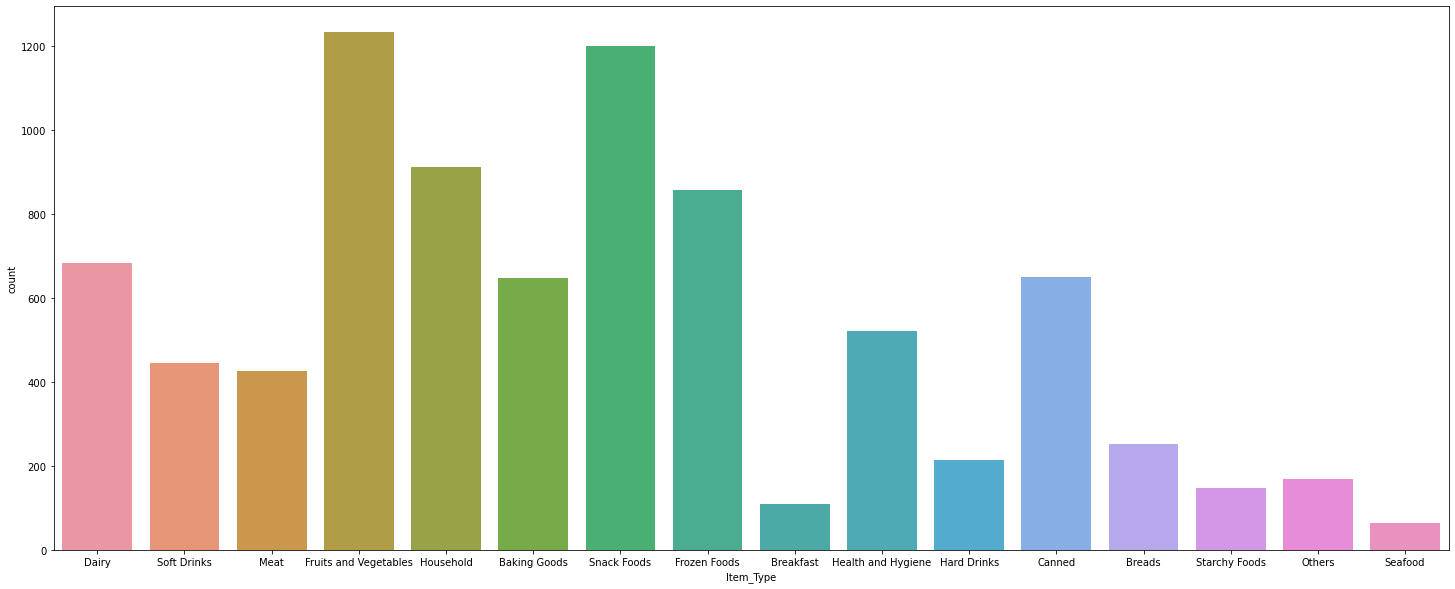

In [405]:
plt.figure(figsize=(25,10))
sns.countplot(x = train['Item_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

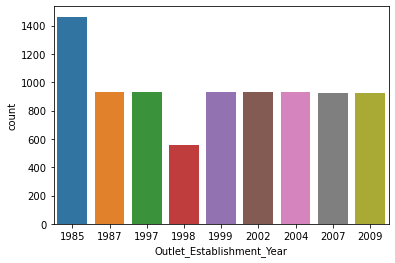

In [406]:
sns.countplot(x = train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

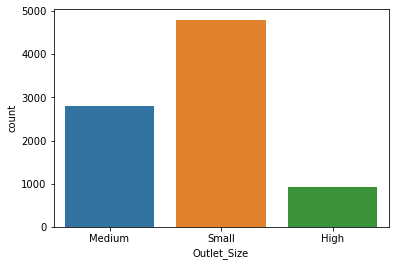

In [407]:
sns.countplot(x = train['Outlet_Size'])

c:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

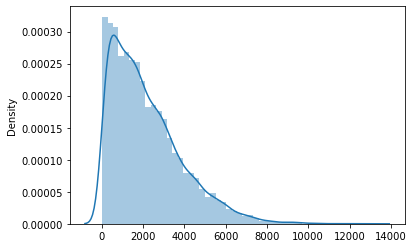

In [408]:
sns.distplot(x = train['Item_Outlet_Sales'])

In [409]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [410]:
encoder = LabelEncoder()
train['Item_Identifier'] = encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [411]:
test['Item_Identifier'] = encoder.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content'] = encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = encoder.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = encoder.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = encoder.fit_transform(test['Outlet_Type'])

In [412]:
x_train = train.drop(labels='Item_Outlet_Sales' , axis=1)
y_train = train['Item_Outlet_Sales']

In [413]:
regressor = XGBRegressor()
regressor.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [414]:
test_pred = regressor.predict(test)